# The Benchmark value of a Decision Tree  
#### Importation of Resources:

In [4]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore') 
seed = 123

col = [
    " left_palm_position_x  ",
    " left_palm_position_y  ",
    " left_palm_position_z  ",
    " left_palm_normal_x  ",
    " left_palm_normal_y  ",
    " left_palm_normal_z  ",
    " left_hand_direction_x  ",
    " left_hand_direction_y  ",
    " left_hand_direction_z  ",
    " left_palm_velocity_x  ",
    " left_palm_velocity_y  ",
    " left_palm_velocity_z  ",
    " left_hand_pitch  ",
    " left_hand_roll  ",
    " left_hand_yaw  ",
    " left_arm_direction_x  ",
    " left_arm_direction_y  ",
    " left_arm_direction_z  ",
    " left_wrist_position_x  ",
    " left_wrist_position_y  ",
    " left_wrist_position_z  ",
    " left_elbow_position_x  ",
    " left_elbow_position_y  ",
    " left_elbow_position_z  ",
    " left_thumb_length  ",
    " left_thumb_width  ",
    " left_thumb_metacarpal_start_x  ",
    " left_thumb_metacarpal_start_y  ",
    " left_thumb_metacarpal_start_z  ",
    " left_thumb_metacarpal_end_x  ",
    " left_thumb_metacarpal_end_y  ",
    " left_thumb_metacarpal_end_z  ",
    " left_thumb_metacarpal_direction_x  ",
    " left_thumb_metacarpal_direction_y  ",
    " left_thumb_metacarpal_direction_z  ",
    " left_thumb_proximal_start_x  ",
    " left_thumb_proximal_start_y  ",
    " left_thumb_proximal_start_z  ",
    " left_thumb_proximal_end_x  ",
    " left_thumb_proximal_end_y  ",
    " left_thumb_proximal_end_z  ",
    " left_thumb_proximal_direction_x  ",
    " left_thumb_proximal_direction_y  ",
    " left_thumb_proximal_direction_z  ",
    " left_thumb_intermediate_start_x  ",
    " left_thumb_intermediate_start_y  ",
    " left_thumb_intermediate_start_z  ",
    " left_thumb_intermediate_end_x  ",
    " left_thumb_intermediate_end_y  ",
    " left_thumb_intermediate_end_z  ",
    " left_thumb_intermediate_direction_x  ",
    " left_thumb_intermediate_direction_y  ",
    " left_thumb_intermediate_direction_z  ",
    " left_thumb_distal_start_x  ",
    " left_thumb_distal_start_y  ",
    " left_thumb_distal_start_z  ",
    " left_thumb_distal_end_x  ",
    " left_thumb_distal_end_y  ",
    " left_thumb_distal_end_z  ",
    " left_thumb_distal_direction_x  ",
    " left_thumb_distal_direction_y  ",
    " left_thumb_distal_direction_z  ",
    " left_index_length  ",
    " left_index_width  ",
    " left_index_metacarpal_start_x  ",
    " left_index_metacarpal_start_y  ",
    " left_index_metacarpal_start_z  ",
    " left_index_metacarpal_end_x  ",
    " left_index_metacarpal_end_y  ",
    " left_index_metacarpal_end_z  ",
    " left_index_metacarpal_direction_x  ",
    " left_index_metacarpal_direction_y  ",
    " left_index_metacarpal_direction_z  ",
    " left_index_proximal_start_x  ",
    " left_index_proximal_start_y  ",
    " left_index_proximal_start_z  ",
    " left_index_proximal_end_x  ",
    " left_index_proximal_end_y  ",
    " left_index_proximal_end_z  ",
    " left_index_proximal_direction_x  ",
    " left_index_proximal_direction_y  ",
    " left_index_proximal_direction_z  ",
    " left_index_intermediate_start_x  ",
    " left_index_intermediate_start_y  ",
    " left_index_intermediate_start_z  ",
    " left_index_intermediate_end_x  ",
    " left_index_intermediate_end_y  ",
    " left_index_intermediate_end_z  ",
    " left_index_intermediate_direction_x  ",
    " left_index_intermediate_direction_y  ",
    " left_index_intermediate_direction_z  ",
    " left_index_distal_start_x  ",
    " left_index_distal_start_y  ",
    " left_index_distal_start_z  ",
    " left_index_distal_end_x  ",
    " left_index_distal_end_y  ",
    " left_index_distal_end_z  ",
    " left_index_distal_direction_x  ",
    " left_index_distal_direction_y  ",
    " left_index_distal_direction_z  ",
    " left_middle_length  ",
    " left_middle_width  ",
    " left_middle_metacarpal_start_x  ",
    " left_middle_metacarpal_start_y  ",
    " left_middle_metacarpal_start_z  ",
    " left_middle_metacarpal_end_x  ",
    " left_middle_metacarpal_end_y  ",
    " left_middle_metacarpal_end_z  ",
    " left_middle_metacarpal_direction_x  ",
    " left_middle_metacarpal_direction_y  ",
    " left_middle_metacarpal_direction_z  ",
    " left_middle_proximal_start_x  ",
    " left_middle_proximal_start_y  ",
    " left_middle_proximal_start_z  ",
    " left_middle_proximal_end_x  ",
    " left_middle_proximal_end_y  ",
    " left_middle_proximal_end_z  ",
    " left_middle_proximal_direction_x  ",
    " left_middle_proximal_direction_y  ",
    " left_middle_proximal_direction_z  ",
    " left_middle_intermediate_start_x  ",
    " left_middle_intermediate_start_y  ",
    " left_middle_intermediate_start_z  ",
    " left_middle_intermediate_end_x  ",
    " left_middle_intermediate_end_y  ",
    " left_middle_intermediate_end_z  ",
    " left_middle_intermediate_direction_x  ",
    " left_middle_intermediate_direction_y  ",
    " left_middle_intermediate_direction_z  ",
    " left_middle_distal_start_x  ",
    " left_middle_distal_start_y  ",
    " left_middle_distal_start_z  ",
    " left_middle_distal_end_x  ",
    " left_middle_distal_end_y  ",
    " left_middle_distal_end_z  ",
    " left_middle_distal_direction_x  ",
    " left_middle_distal_direction_y  ",
    " left_middle_distal_direction_z  ",
    " left_ring_length  ",
    " left_ring_width  ",
    " left_ring_metacarpal_start_x  ",
    " left_ring_metacarpal_start_y  ",
    " left_ring_metacarpal_start_z  ",
    " left_ring_metacarpal_end_x  ",
    " left_ring_metacarpal_end_y  ",
    " left_ring_metacarpal_end_z  ",
    " left_ring_metacarpal_direction_x  ",
    " left_ring_metacarpal_direction_y  ",
    " left_ring_metacarpal_direction_z  ",
    " left_ring_proximal_start_x  ",
    " left_ring_proximal_start_y  ",
    " left_ring_proximal_start_z  ",
    " left_ring_proximal_end_x  ",
    " left_ring_proximal_end_y  ",
    " left_ring_proximal_end_z  ",
    " left_ring_proximal_direction_x  ",
    " left_ring_proximal_direction_y  ",
    " left_ring_proximal_direction_z  ",
    " left_ring_intermediate_start_x  ",
    " left_ring_intermediate_start_y  ",
    " left_ring_intermediate_start_z  ",
    " left_ring_intermediate_end_x  ",
    " left_ring_intermediate_end_y  ",
    " left_ring_intermediate_end_z  ",
    " left_ring_intermediate_direction_x  ",
    " left_ring_intermediate_direction_y  ",
    " left_ring_intermediate_direction_z  ",
    " left_ring_distal_start_x  ",
    " left_ring_distal_start_y  ",
    " left_ring_distal_start_z  ",
    " left_ring_distal_end_x  ",
    " left_ring_distal_end_y  ",
    " left_ring_distal_end_z  ",
    " left_ring_distal_direction_x  ",
    " left_ring_distal_direction_y  ",
    " left_ring_distal_direction_z  ",
    " left_pinky_length  ",
    " left_pinky_width  ",
    " left_pinky_metacarpal_start_x  ",
    " left_pinky_metacarpal_start_y  ",
    " left_pinky_metacarpal_start_z  ",
    " left_pinky_metacarpal_end_x  ",
    " left_pinky_metacarpal_end_y",
    " left_pinky_metacarpal_end_z",
    " left_pinky_metacarpal_direction_x",
    " left_pinky_metacarpal_direction_y",
    " left_pinky_metacarpal_direction_z",
    " left_pinky_proximal_start_x",
    " left_pinky_proximal_start_y",
    " left_pinky_proximal_start_z",
    " left_pinky_proximal_end_x",
    " left_pinky_proximal_end_y",
    " left_pinky_proximal_end_z",
    " left_pinky_proximal_direction_x",
    " left_pinky_proximal_direction_y",
    " left_pinky_proximal_direction_z",
    " left_pinky_intermediate_start_x",
    " left_pinky_intermediate_start_y",
    " left_pinky_intermediate_start_z",
    " left_pinky_intermediate_end_x",
    " left_pinky_intermediate_end_y",
    " left_pinky_intermediate_end_z",
    " left_pinky_intermediate_direction_x",
    " left_pinky_intermediate_direction_y",
    " left_pinky_intermediate_direction_z",
    " left_pinky_distal_start_x",
    " left_pinky_distal_start_y",
    " left_pinky_distal_start_z",
    " left_pinky_distal_end_x",
    " left_pinky_distal_end_y",
    " left_pinky_distal_end_z",
    " left_pinky_distal_direction_x",
    " left_pinky_distal_direction_y",
    " left_pinky_distal_direction_z",
    " right_palm_position_x ",
    " right_palm_position_y  ",
    " right_palm_position_z  ",
    " right_palm_normal_x  ",
    " right_palm_normal_y  ",
    " right_palm_normal_z  ",
    " right_hand_direction_x  ",
    " right_hand_direction_y  ",
    " right_hand_direction_z  ",
    " right_palm_velocity_x  ",
    " right_palm_velocity_y  ",
    " right_palm_velocity_z  ",
    " right_hand_pitch  ",
    " right_hand_roll  ",
    " right_hand_yaw  ",
    " right_arm_direction_x  ",
    " right_arm_direction_y  ",
    " right_arm_direction_z  ",
    " right_wrist_position_x  ",
    " right_wrist_position_y  ",
    " right_wrist_position_z  ",
    " right_elbow_position_x  ",
    " right_elbow_position_y  ",
    " right_elbow_position_z  ",
    " right_thumb_length  ",
    " right_thumb_width  ",
    " right_thumb_metacarpal_start_x  ",
    " right_thumb_metacarpal_start_y  ",
    " right_thumb_metacarpal_start_z  ",
    " right_thumb_metacarpal_end_x  ",
    " right_thumb_metacarpal_end_y  ",
    " right_thumb_metacarpal_end_z  ",
    " right_thumb_metacarpal_direction_x  ",
    " right_thumb_metacarpal_direction_y  ",
    " right_thumb_metacarpal_direction_z  ",
    " right_thumb_proximal_start_x  ",
    " right_thumb_proximal_start_y  ",
    " right_thumb_proximal_start_z  ",
    " right_thumb_proximal_end_x  ",
    " right_thumb_proximal_end_y  ",
    " right_thumb_proximal_end_z  ",
    " right_thumb_proximal_direction_x  ",
    " right_thumb_proximal_direction_y  ",
    " right_thumb_proximal_direction_z  ",
    " right_thumb_intermediate_start_x  ",
    " right_thumb_intermediate_start_y  ",
    " right_thumb_intermediate_start_z  ",
    " right_thumb_intermediate_end_x  ",
    " right_thumb_intermediate_end_y  ",
    " right_thumb_intermediate_end_z  ",
    " right_thumb_intermediate_direction_x  ",
    " right_thumb_intermediate_direction_y  ",
    " right_thumb_intermediate_direction_z  ",
    " right_thumb_distal_start_x  ",
    " right_thumb_distal_start_y  ",
    " right_thumb_distal_start_z  ",
    " right_thumb_distal_end_x  ",
    " right_thumb_distal_end_y  ",
    " right_thumb_distal_end_z  ",
    " right_thumb_distal_direction_x  ",
    " right_thumb_distal_direction_y  ",
    " right_thumb_distal_direction_z  ",
    " right_index_length  ",
    " right_index_width  ",
    " right_index_metacarpal_start_x  ",
    " right_index_metacarpal_start_y  ",
    " right_index_metacarpal_start_z  ",
    " right_index_metacarpal_end_x  ",
    " right_index_metacarpal_end_y  ",
    " right_index_metacarpal_end_z  ",
    " right_index_metacarpal_direction_x  ",
    " right_index_metacarpal_direction_y  ",
    " right_index_metacarpal_direction_z  ",
    " right_index_proximal_start_x  ",
    " right_index_proximal_start_y  ",
    " right_index_proximal_start_z  ",
    " right_index_proximal_end_x  ",
    " right_index_proximal_end_y  ",
    " right_index_proximal_end_z  ",
    " right_index_proximal_direction_x  ",
    " right_index_proximal_direction_y  ",
    " right_index_proximal_direction_z  ",
    " right_index_intermediate_start_x  ",
    " right_index_intermediate_start_y  ",
    " right_index_intermediate_start_z  ",
    " right_index_intermediate_end_x  ",
    " right_index_intermediate_end_y  ",
    " right_index_intermediate_end_z  ",
    " right_index_intermediate_direction_x  ",
    " right_index_intermediate_direction_y  ",
    " right_index_intermediate_direction_z  ",
    " right_index_distal_start_x  ",
    " right_index_distal_start_y  ",
    " right_index_distal_start_z  ",
    " right_index_distal_end_x  ",
    " right_index_distal_end_y  ",
    " right_index_distal_end_z  ",
    " right_index_distal_direction_x  ",
    " right_index_distal_direction_y  ",
    " right_index_distal_direction_z  ",
    " right_middle_length  ",
    " right_middle_width  ",
    " right_middle_metacarpal_start_x  ",
    " right_middle_metacarpal_start_y  ",
    " right_middle_metacarpal_start_z  ",
    " right_middle_metacarpal_end_x  ",
    " right_middle_metacarpal_end_y  ",
    " right_middle_metacarpal_end_z  ",
    " right_middle_metacarpal_direction_x  ",
    " right_middle_metacarpal_direction_y  ",
    " right_middle_metacarpal_direction_z  ",
    " right_middle_proximal_start_x  ",
    " right_middle_proximal_start_y  ",
    " right_middle_proximal_start_z  ",
    " right_middle_proximal_end_x  ",
    " right_middle_proximal_end_y  ",
    " right_middle_proximal_end_z  ",
    " right_middle_proximal_direction_x  ",
    " right_middle_proximal_direction_y  ",
    " right_middle_proximal_direction_z  ",
    " right_middle_intermediate_start_x  ",
    " right_middle_intermediate_start_y  ",
    " right_middle_intermediate_start_z  ",
    " right_middle_intermediate_end_x  ",
    " right_middle_intermediate_end_y  ",
    " right_middle_intermediate_end_z  ",
    " right_middle_intermediate_direction_x  ",
    " right_middle_intermediate_direction_y  ",
    " right_middle_intermediate_direction_z  ",
    " right_middle_distal_start_x  ",
    " right_middle_distal_start_y  ",
    " right_middle_distal_start_z  ",
    " right_middle_distal_end_x  ",
    " right_middle_distal_end_y  ",
    " right_middle_distal_end_z  ",
    " right_middle_distal_direction_x  ",
    " right_middle_distal_direction_y  ",
    " right_middle_distal_direction_z  ",
    " right_ring_length  ",
    " right_ring_width  ",
    " right_ring_metacarpal_start_x  ",
    " right_ring_metacarpal_start_y  ",
    " right_ring_metacarpal_start_z  ",
    " right_ring_metacarpal_end_x  ",
    " right_ring_metacarpal_end_y  ",
    " right_ring_metacarpal_end_z  ",
    " right_ring_metacarpal_direction_x  ",
    " right_ring_metacarpal_direction_y  ",
    " right_ring_metacarpal_direction_z  ",
    " right_ring_proximal_start_x  ",
    " right_ring_proximal_start_y  ",
    " right_ring_proximal_start_z  ",
    " right_ring_proximal_end_x  ",
    " right_ring_proximal_end_y  ",
    " right_ring_proximal_end_z  ",
    " right_ring_proximal_direction_x  ",
    " right_ring_proximal_direction_y  ",
    " right_ring_proximal_direction_z  ",
    " right_ring_intermediate_start_x  ",
    " right_ring_intermediate_start_y  ",
    " right_ring_intermediate_start_z  ",
    " right_ring_intermediate_end_x  ",
    " right_ring_intermediate_end_y  ",
    " right_ring_intermediate_end_z  ",
    " right_ring_intermediate_direction_x  ",
    " right_ring_intermediate_direction_y  ",
    " right_ring_intermediate_direction_z  ",
    " right_ring_distal_start_x  ",
    " right_ring_distal_start_y  ",
    " right_ring_distal_start_z  ",
    " right_ring_distal_end_x  ",
    " right_ring_distal_end_y  ",
    " right_ring_distal_end_z  ",
    " right_ring_distal_direction_x  ",
    " right_ring_distal_direction_y  ",
    " right_ring_distal_direction_z  ",
    " right_pinky_length  ",
    " right_pinky_width  ",
    " right_pinky_metacarpal_start_x  ",
    " right_pinky_metacarpal_start_y  ",
    " right_pinky_metacarpal_start_z  ",
    " right_pinky_metacarpal_end_x  ",
    " right_pinky_metacarpal_end_y  ",
    " right_pinky_metacarpal_end_z  ",
    " right_pinky_metacarpal_direction_x  ",
    " right_pinky_metacarpal_direction_y  ",
    " right_pinky_metacarpal_direction_z  ",
    " right_pinky_proximal_start_x  ",
    " right_pinky_proximal_start_y  ",
    " right_pinky_proximal_start_z  ",
    " right_pinky_proximal_end_x  ",
    " right_pinky_proximal_end_y  ",
    " right_pinky_proximal_end_z  ",
    " right_pinky_proximal_direction_x  ",
    " right_pinky_proximal_direction_y  ",
    " right_pinky_proximal_direction_z  ",
    " right_pinky_intermediate_start_x  ",
    " right_pinky_intermediate_start_y  ",
    " right_pinky_intermediate_start_z  ",
    " right_pinky_intermediate_end_x  ",
    " right_pinky_intermediate_end_y  ",
    " right_pinky_intermediate_end_z  ",
    " right_pinky_intermediate_direction_x  ",
    " right_pinky_intermediate_direction_y  ",
    " right_pinky_intermediate_direction_z  ",
    " right_pinky_distal_start_x  ",
    " right_pinky_distal_start_y  ",
    " right_pinky_distal_start_z  ",
    " right_pinky_distal_end_x  ",
    " right_pinky_distal_end_y  ",
    " right_pinky_distal_end_z  ",
    " right_pinky_distal_direction_x  ",
    " right_pinky_distal_direction_y  ",
    " right_pinky_distal_direction_z  ",
    "label"
]


#### Reading in the dataset and splitting it accordingly into its X and y. X values are scaled and y values are encoded.

+ df = Dataframe which contains the training dataset values and their columns
+ X = Features in the training dataset which are used to predict the targets
+ y = Classes/Targets in the training dataset which are to be predicted
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target
+ dt = Decision Tree classifier
+ dtScore = A list of every decision tree score that is obtained in each fold of the cross validation technique
+ kf = K-fold cross validation 


In [5]:
df = pd.read_csv("../Study's Main Raw Datasets/TrainingData.csv", names=col) 
df = pd.DataFrame(df.sample(frac=1, random_state=seed).reset_index(
    drop=True))  

le = LabelEncoder()
min_max_scaler = MinMaxScaler()

X = df.iloc[:, :-1]  
Y = df.iloc[:, -1:] 

X = min_max_scaler.fit_transform(X)
Y = le.fit_transform(Y)

kf = KFold(n_splits=10, random_state=seed, shuffle=True)
dt = DecisionTreeClassifier(random_state=seed)
dtScore = []


# 
# 
# The training of the classifier using the updated X and y variables follows:
For every fold, the classifiers are firstly fit to the X_train and y_train variables which is the training process. The score method outputs the accuracy which the classifier obtains at predicting the correct value for y_test given the X_test variable. This score is then added to the list of decision tree scores before repeating these steps until all cross validation folds have been processed.

In [6]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    dt.fit(X_train, y_train)
    res = dt.score(X_test, y_test)
    dtScore.append(res)


#### The list of accuracies, the Mean and the Standard deviation of the trained decision tree classifier are outputted below:

In [10]:
print("Decision Tree:")
print(dtScore)
standar = np.std(dtScore)
print("\n\nStandard Deviation = %0.4f" % (standar))
meanVal = np.mean(dtScore)
print("Mean Value is = %0.4f" % (meanVal))


Decision Tree:
[0.9836106908724155, 0.9851235501765002, 0.9795763993948563, 0.9851235501765002, 0.9813414019162885, 0.9788199697428139, 0.9810844892812106, 0.9846153846153847, 0.9825977301387138, 0.9808322824716267]


Standard Deviation = 0.0022
Mean Value is = 0.9823


# 
# 
# The Testing of the models on unseen tesing data can be seen below:
#### Reading in the unseen dataset and splitting it accordingly into its X and y (X_unseen and Y_unseen respectively). X values are scaled and y values are encoded.
+ df_unseen = Dataframe which contains the unseen testing dataset values and their columns
+ X_unseen = Features in the unseen testing dataset which are used to predict the targets
+ Y_unseen = Classes/Targets in the unseen testing dataset which are to be predicted
+ min_max_scaler = Scales all feature values so that they are within the same range of 0 to 1 (normalising them)
+ le = Label Encoder used to encode the categorical values of the target
+ score_unseen = The accuracy that is obtained of the decision tree classifier classifying unseen data


In [11]:
df_unseen = pd.read_csv("../Study's Main Raw Datasets/TestingData.csv", names=col)  
df_unseen = pd.DataFrame(df_unseen.sample(frac=1, random_state=seed).reset_index(drop=True))  

X_unseen = df_unseen.iloc[:, :-1]  
Y_unseen = df_unseen.iloc[:, -1:]  

X_unseen = min_max_scaler.fit_transform(X_unseen)
Y_unseen = le.fit_transform(Y_unseen)

score_unseen = dt.score(X_unseen, Y_unseen)
print(score_unseen)

0.3997569866342649


#### The Confusion matrix for the Decision Tree Benchmark

<AxesSubplot:>

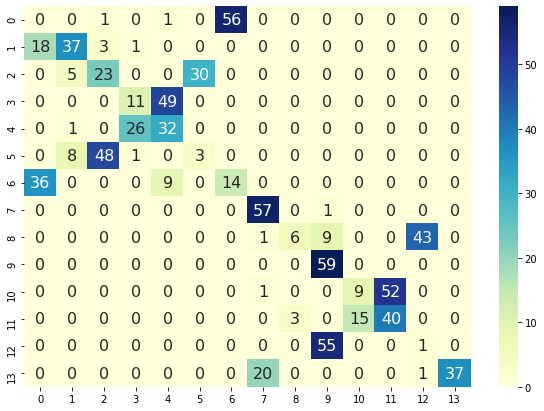

In [12]:
predict = []
expect = []
pred = dt.predict(X_unseen)
expect = Y_unseen
c_matrix = confusion_matrix(expect, pred)
df_cm = pd.DataFrame(c_matrix)
plt.figure(figsize=(10,7))
plt.title('Decision Tree Confusion Matrix')
sn.heatmap(df_cm,annot=True, cmap="YlGnBu", annot_kws={"size":16})